https://www.youtube.com/watch?v=xlHk4okO8Ls&t=1s

### Some Links
https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2

# Feature Selection

In [284]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [286]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2

### SelectKBest -
<br > Feature - Cat,     Target - Cat ==> Chi-Square <br /> 
<br > Feature - Numeric, Target - Numeric ==> Correlation <br /> 
<br > Feature - Cat,     Target - Numeric ==> f_regression <br /> 
<br > Feature - Numeric, Target - Cat ==> f_classification <br /> 

In [287]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [288]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [289]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [290]:
df.shape

(768, 9)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [292]:
df['Outcome'].value_counts() # there is a class imbalance, but we won't fix it right now

0    500
1    268
Name: Outcome, dtype: int64

In [293]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [294]:
df.shape

(768, 9)

In [295]:
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressureCube'] = df['BloodPressure']**3
df['BloodPressureSqrt'] = np.sqrt(df['BloodPressure'])

In [296]:
df['GlucoseSquare'] = np.square(df['Glucose'])
df['GlucoseCube'] = df['Glucose']**3
df['GlucoseSqrt'] = np.sqrt(df['Glucose'])

In [297]:
df['GlucoseBloodPressure'] = df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']

In [298]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  BloodPressureSquare  \
0                     0.627   50        1                 5184   
1                     0.351   31        0                 4356   
2                     0.672   32        1                 4096   
3                     0.167   21        0                 4356   
4                     2.288   33        1                 1600   

   BloodPressureCube  BloodPressureSqrt  GlucoseSquare  GlucoseCube  \
0             373248              8.485          21904      3241792   
1             287496              8.124           7225       614125   
2             262144              8.000          33489      6128487   
3             287496              8.124           7921       704969   
4              64000              6.325          18769      2571353   

   GlucoseSqrt  GlucoseBloodPressure   AgeBMI  
0       12.166                 10656 1680.000  
1        9.220                  5610  824.600  
2       13.528                 11712  745.600  
3        9.434                  5874  590.100  
4       11.705                  5480 1422.300

In [299]:
df.shape

(768, 17)

In [300]:
# checking for categorical columns
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [301]:
# checking for numerical columns
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressureCube',
 'BloodPressureSqrt',
 'GlucoseSquare',
 'GlucoseCube',
 'GlucoseSqrt',
 'GlucoseBloodPressure',
 'AgeBMI']

In [302]:
target = 'Outcome'

In [303]:
df[numerical_feature_columns].corr() # correlation

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                     1.000    0.129          0.141         -0.082   
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   
Outcome                         0.222    0.467          0.065          0.075   
BloodPressureSquare             0.175    0.193          0.939          0.143   
BloodPressureCube               0.176    0.199          0.854          0.100   
BloodPressureSqrt               0.093    0.101          0.958          0.244   
GlucoseSquare                   0.127    0.979          0.153          0.072   
GlucoseCube                     0.120    0.946          0.147          0.080   
GlucoseSqrt                     0.121    0.964          0.137          0.036   
GlucoseBloodPressure            0.180    0.739          0.760          0.171   
AgeBMI                          0.464    0.321          0.334          0.121   

                          Insulin   BMI  DiabetesPedigreeFunction    Age  \
Pregnancies                -0.074 0.018                    -0.034  0.544   
Glucose                     0.331 0.221                     0.137  0.264   
BloodPressure               0.089 0.282                     0.041  0.240   
SkinThickness               0.437 0.393                     0.184 -0.114   
Insulin                     1.000 0.198                     0.185 -0.042   
BMI                         0.198 1.000                     0.141  0.036   
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034   
Age                        -0.042 0.036                     0.034  1.000   
Outcome                     0.131 0.293                     0.174  0.238   
BloodPressureSquare         0.041 0.297                     0.027  0.293   
BloodPressureCube           0.015 0.288                     0.017  0.296   
BloodPressureSqrt           0.123 0.246                     0.050  0.166   
GlucoseSquare               0.335 0.226                     0.146  0.268   
GlucoseCube                 0.328 0.219                     0.150  0.261   
GlucoseSqrt                 0.305 0.193                     0.123  0.238   
GlucoseBloodPressure        0.267 0.305                     0.116  0.325   
AgeBMI                      0.069 0.578                     0.098  0.809   

                          Outcome  BloodPressureSquare  BloodPressureCube  \
Pregnancies                 0.222                0.175              0.176   
Glucose                     0.467                0.193              0.199   
BloodPressure               0.065                0.939              0.854   
SkinThickness               0.075                0.143              0.100   
Insulin                     0.131                0.041              0.015   
BMI                         0.293                0.297              0.288   
DiabetesPedigreeFunction    0.174                0.027              0.017   
Age                         0.238                0.293              0.296   
Outcome                     1.000                0.113              0.128   
BloodPressureSquare         0.113                1.000              0.979   
BloodPressureCube           0.128                0.979              1.000   
BloodPressureSqrt           0.016                0.805              0.680   
GlucoseSquare               0.484                0.191              0.196   
GlucoseCube                 0.477                0.181              0.185   
GlucoseSqrt                 0.406                0.176       

In [304]:
k= 15
df[numerical_feature_columns].corr().nlargest(k, target) # top 15 based on Outcome column

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Outcome                         0.222    0.467          0.065          0.075   
GlucoseSquare                   0.127    0.979          0.153          0.072   
GlucoseCube                     0.120    0.946          0.147          0.080   
Glucose                         0.129    1.000          0.153          0.057   
GlucoseSqrt                     0.121    0.964          0.137          0.036   
AgeBMI                          0.464    0.321          0.334          0.121   
GlucoseBloodPressure            0.180    0.739          0.760          0.171   
BMI                             0.018    0.221          0.282          0.393   
Age                             0.544    0.264          0.240         -0.114   
Pregnancies                     1.000    0.129          0.141         -0.082   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Insulin                        -0.074    0.331          0.089          0.437   
BloodPressureCube               0.176    0.199          0.854          0.100   
BloodPressureSquare             0.175    0.193          0.939          0.143   
SkinThickness                  -0.082    0.057          0.207          1.000   

                          Insulin   BMI  DiabetesPedigreeFunction    Age  \
Outcome                     0.131 0.293                     0.174  0.238   
GlucoseSquare               0.335 0.226                     0.146  0.268   
GlucoseCube                 0.328 0.219                     0.150  0.261   
Glucose                     0.331 0.221                     0.137  0.264   
GlucoseSqrt                 0.305 0.193                     0.123  0.238   
AgeBMI                      0.069 0.578                     0.098  0.809   
GlucoseBloodPressure        0.267 0.305                     0.116  0.325   
BMI                         0.198 1.000                     0.141  0.036   
Age                        -0.042 0.036                     0.034  1.000   
Pregnancies                -0.074 0.018                    -0.034  0.544   
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034   
Insulin                     1.000 0.198                     0.185 -0.042   
BloodPressureCube           0.015 0.288                     0.017  0.296   
BloodPressureSquare         0.041 0.297                     0.027  0.293   
SkinThickness               0.437 0.393                     0.184 -0.114   

                          Outcome  BloodPressureSquare  BloodPressureCube  \
Outcome                     1.000                0.113              0.128   
GlucoseSquare               0.484                0.191              0.196   
GlucoseCube                 0.477                0.181              0.185   
Glucose                     0.467                0.193              0.199   
GlucoseSqrt                 0.406                0.176              0.183   
AgeBMI                      0.358                0.392              0.395   
GlucoseBloodPressure        0.333                0.752              0.705   
BMI                         0.293                0.297              0.288   
Age                         0.238                0.293              0.296   
Pregnancies                 0.222                0.175              0.176   
DiabetesPedigreeFunction    0.174                0.027              0.017   
Insulin                     0.131                0.041              0.015   
BloodPressureCube           0.128                0.979              1.000   
BloodPressureSquare         0.113                1.000              0.979   
SkinThickness               0.075                0.143              0.100   

                          BloodPressureSqrt  GlucoseSquare  GlucoseCube  \
Outcome                               0.016          0.484        0.477   
GlucoseSquare                         0.105          1.000        0.991   
GlucoseCube                           0.103          0.991        1.00

<AxesSubplot:>

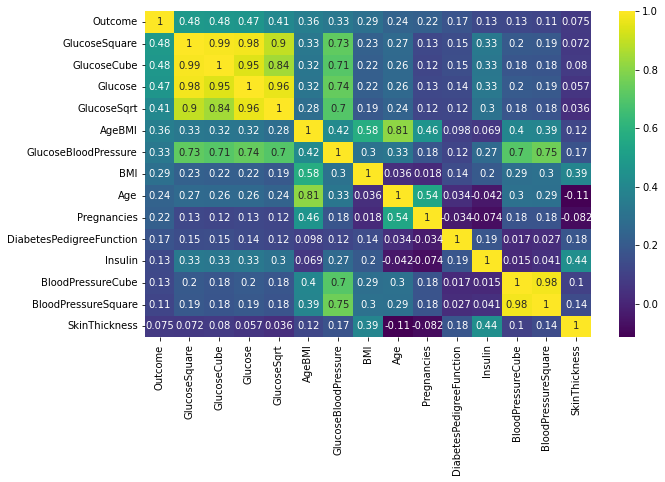

In [305]:
k = 15     # number of variables for heatmap

cols = df[numerical_feature_columns].corr().nlargest(k, 'Outcome')['Outcome'].index

cm = df[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [306]:
X = df.loc[:, df.columns != target]
y = df.loc[:, df.columns == target]

In [307]:
X.shape

(768, 16)

In [308]:
y.shape

(768, 1)

In [309]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [310]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [311]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.7598425196850394
F1 score is:  0.6013071895424835


Actual      0   1
Predicted        
0          39  23
1          15   8


1

## Univariate feature selection

#### ANOVA f-test Feature Selection


ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

### Univariate feature selection using Select KBest using ANNOVA

Pick a feature and do ANNOVA test with the target variable. Find out it's Statistical Significance of the test of independence.

Keep the feature based on the strength of the significance.

In [312]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [313]:
select_feature1 = SelectKBest(score_func=f_classif, k=5).fit(x_train, y_train)

In [314]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Significance_Scores':select_feature1.scores_})
selected_features_df.sort_values(by='Significance_Scores', ascending=False)

Feature  Significance_Scores
11             GlucoseSquare              154.657
12               GlucoseCube              145.912
1                    Glucose              145.358
13               GlucoseSqrt              107.855
15                    AgeBMI               62.604
14      GlucoseBloodPressure               58.405
5                        BMI               39.859
6   DiabetesPedigreeFunction               23.324
7                        Age               23.179
0                Pregnancies               18.793
9          BloodPressureCube                7.141
4                    Insulin                6.805
8        BloodPressureSquare                4.962
3              SkinThickness                3.899
2              BloodPressure                1.465
10         BloodPressureSqrt                0.088

In [315]:
x_train_annova = select_feature1.transform(x_train)
x_test_annova = select_feature1.transform(x_test)

In [316]:
x_train.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
60             2       84              0              0        0  0.000   
332            1      180              0              0        0 43.300   
421            2       94             68             18       76 26.000   

     DiabetesPedigreeFunction  Age  BloodPressureSquare  BloodPressureCube  \
60                      0.304   21                    0                  0   
332                     0.282   41                    0                  0   
421                     0.561   21                 4624             314432   

     BloodPressureSqrt  GlucoseSquare  GlucoseCube  GlucoseSqrt  \
60               0.000           7056       592704        9.165   
332              0.000          32400      5832000       13.416   
421              8.246           8836       830584        9.695   

     GlucoseBloodPressure   AgeBMI  
60                      0    0.000  
332                     0 1775.300  
421                  6392  546.000

In [317]:
x_train_annova # we can see only 5 columns as the value of k was 5

array([[8.400e+01, 7.056e+03, 5.927e+05, 9.165e+00, 0.000e+00],
       [1.800e+02, 3.240e+04, 5.832e+06, 1.342e+01, 1.775e+03],
       [9.400e+01, 8.836e+03, 8.306e+05, 9.695e+00, 5.460e+02],
       ...,
       [1.580e+02, 2.496e+04, 3.944e+06, 1.257e+01, 1.877e+03],
       [1.300e+02, 1.690e+04, 2.197e+06, 1.140e+01, 5.698e+02],
       [1.340e+02, 1.796e+04, 2.406e+06, 1.158e+01, 6.647e+02]])

In [318]:
x_train_annova[0:3] # we can see only 5 columns as the value of k was 5

array([[8.400e+01, 7.056e+03, 5.927e+05, 9.165e+00, 0.000e+00],
       [1.800e+02, 3.240e+04, 5.832e+06, 1.342e+01, 1.775e+03],
       [9.400e+01, 8.836e+03, 8.306e+05, 9.695e+00, 5.460e+02]])

In [319]:
lr_annova_model = clf_lr.fit(x_train_annova,y_train) # training model using those 5 features

In [320]:
generate_accuracy_and_heatmap(lr_annova_model, x_test_annova, y_test)

Accuracy is:  0.7677165354330708
F1 score is:  0.5874125874125875


Actual      0   1
Predicted        
0          43  24
1          11   7


1

### Recursive feature Elimination (Backward Feature Elimination)

It is a backward way of doing feature Elimination/ Feature Selection


We start with all feature, build a model check the accuracy score .

Next with step function we remove 1 feature , build the model again and check the accuracy score or f-1 score


In [321]:
rfe = RFE(estimator=clf_lr, step=1) # step = 1 means removing 1 feauture every iteration
rfe = rfe.fit(x_train, y_train)

In [322]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

# 1 is most important features

Feature  Ranking
0                Pregnancies        1
1                    Glucose        1
4                    Insulin        1
5                        BMI        1
7                        Age        1
10         BloodPressureSqrt        1
13               GlucoseSqrt        1
15                    AgeBMI        1
2              BloodPressure        2
14      GlucoseBloodPressure        3
11             GlucoseSquare        4
8        BloodPressureSquare        5
9          BloodPressureCube        6
3              SkinThickness        7
12               GlucoseCube        8
6   DiabetesPedigreeFunction        9

In [323]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [324]:
x_train_rfe[0:3] # 8 important features where Ranking was 1 

array([[2.000e+00, 8.400e+01, 0.000e+00, 0.000e+00, 2.100e+01, 0.000e+00,
        9.165e+00, 0.000e+00],
       [1.000e+00, 1.800e+02, 0.000e+00, 4.330e+01, 4.100e+01, 0.000e+00,
        1.342e+01, 1.775e+03],
       [2.000e+00, 9.400e+01, 7.600e+01, 2.600e+01, 2.100e+01, 8.246e+00,
        9.695e+00, 5.460e+02]])

In [325]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [326]:
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

Accuracy is:  0.7874015748031497
F1 score is:  0.6538461538461539


Actual      0   1
Predicted        
0          35  23
1          19   8


1

## Recursive feature elimination with cross validation (Backward Feature Elimination)

In [348]:
clf_lr = LogisticRegression()

In [358]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy') # step = 1 means removing 1 feauture each time
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'BloodPressureSqrt',
       'GlucoseSqrt', 'AgeBMI'],
      dtype='object')


In [359]:
rfecv.grid_scores_

# accuracy score with different number and different type of features

array([[0.796, 0.641, 0.748, 0.738, 0.745],
       [0.786, 0.718, 0.738, 0.738, 0.725],
       [0.786, 0.709, 0.738, 0.748, 0.765],
       [0.825, 0.728, 0.738, 0.767, 0.735],
       [0.835, 0.718, 0.777, 0.767, 0.755],
       [0.816, 0.718, 0.786, 0.786, 0.755],
       [0.835, 0.718, 0.786, 0.757, 0.775],
       [0.835, 0.718, 0.757, 0.767, 0.765],
       [0.835, 0.728, 0.757, 0.767, 0.755],
       [0.845, 0.728, 0.728, 0.748, 0.755],
       [0.845, 0.709, 0.786, 0.748, 0.755],
       [0.825, 0.709, 0.786, 0.748, 0.765],
       [0.816, 0.748, 0.767, 0.748, 0.755],
       [0.806, 0.738, 0.767, 0.748, 0.716],
       [0.835, 0.757, 0.748, 0.738, 0.706],
       [0.835, 0.748, 0.748, 0.738, 0.735]])

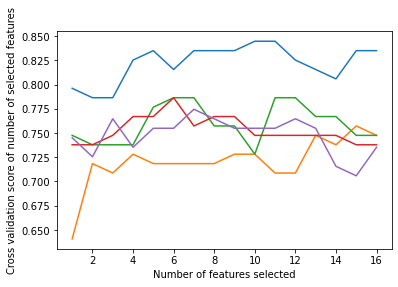

In [360]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [361]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [362]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [363]:
generate_accuracy_and_heatmap(lr_rfecv_model, x_test_rfecv, y_test)

Accuracy is:  0.7795275590551181
F1 score is:  0.6410256410256411


Actual      0   1
Predicted        
0          36  23
1          18   8


1

___
___

## Feature Selection using Chi-Square

https://www.youtube.com/watch?v=fMIwIKLGke0

The chi-square test is used to estimate how likely the observations that are made would be, by considering the assumption of the null hypothesis as true.

A hypothesis is a consideration that a given condition or statement might be true, which we can test afterwards. Chi-squared tests are usually created from a sum of squared falsities or errors over the sample variance.


When we consider, the null speculation is true, the sampling distribution of the test statistic is called as chi-squared distribution. The chi-squared test helps to determine whether there is a notable difference between the normal frequencies and the observed frequencies in one or more classes or categories. It gives the probability of independent variables.


P stands for probability here. To calculate the p-value, the chi-square test is used in statistics. The different values of p indicates the different hypothesis interpretation, are given below:

P≤ 0.05; Hypothesis rejected
P>.05; Hypothesis Accepted

In [333]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2

In [334]:
df = pd.read_excel('accident.xlsx')
df.head()

is_adult  is_male  accident
0         1        0         1
1         1        1         1
2         1        1         0
3         1        1         0
4         1        0         0

In [335]:
df.shape

(927, 3)

In [336]:
# finding pattern wrt feature and target column
adult_accident_crosstab = pd.crosstab(df['is_adult'], df['accident'], 
                                      margins=True)
adult_accident_crosstab

accident    0    1  All
is_adult               
1         781  146  927
All       781  146  927

In [337]:
# finding pattern wrt feature and target column
gender_accident_crosstab = pd.crosstab(df['is_male'], df['accident'], 
                                       margins=True)
gender_accident_crosstab

accident    0    1  All
is_male                
0         154   47  201
1         627   99  726
All       781  146  927

#### Chi-square test works only on Categorical variables for Discrete variables

In [338]:
# using chi-square test on is_male and accident
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
          print('Independent (fail to reject H0)')
    return expected

In [339]:
exp_table_1 = check_categorical_dependency(adult_accident_crosstab, 0.95) # passing 1st table

Chi-Square Statistic value = 0.0
P - Value = 1.0
Independent (fail to reject H0)


In [340]:
pd.DataFrame(exp_table_1)

0       1       2
0 781.000 146.000 927.000
1 781.000 146.000 927.000

In [341]:
exp_table_2 = check_categorical_dependency(gender_accident_crosstab, 0.95) # for 2nd table of gender

Chi-Square Statistic value = 11.270043347013548
P - Value = 0.023691007358727482
Dependent (reject H0)


Since p-value is less than 0.05,  we reject the null hypothesis

So we can conclude that the target column (prone_to_accident) is dependent on gender column based on the p-value

In [342]:
pd.DataFrame(exp_table_2)

0       1       2
0 169.343  31.657 201.000
1 611.657 114.343 726.000
2 781.000 146.000 927.000

## BEST Feature Selection using Chi-Square

Do Again

In [343]:
X = df[["is_adult", "is_male"]]

In [344]:
y = df[["accident"]]

In [345]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y) # want only 1 feature with highest ch-square value

In [346]:
X_new.shape

(927, 1)

In [347]:
pd.crosstab(np.squeeze(X_new), np.squeeze(y))

accident    0   1
row_0            
0         154  47
1         627  99